In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')


# importing dataset

In [2]:
df=pd.read_csv('bank.csv',header=0,sep=";")

In [3]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


performing EDA

In [4]:
df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [5]:
df.duplicated().sum()

12

In [6]:
print(df.dtypes)

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


In [7]:
print(df.shape)

(41188, 21)


In [8]:
print(df.describe())

               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198    

In [9]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

12

# univariate analysis of categorical value

Analysis of job

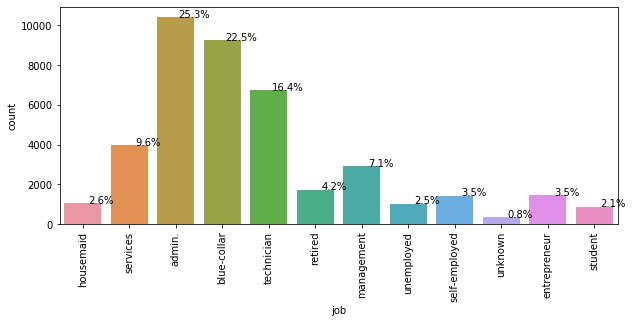

In [11]:
plt.figure(figsize=(10,4))
ax=sns.countplot(x='job',data=df)
plt.xticks(rotation='vertical')

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()


Majority of the customers have Secondary education and beyond.

Analysis of marital

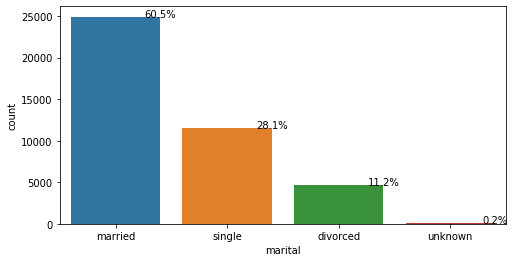

In [12]:
plt.figure(figsize=(8,4))
ax=sns.countplot(x='marital',data=df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()


Most of the customers contacted are married.

Analysis of Education

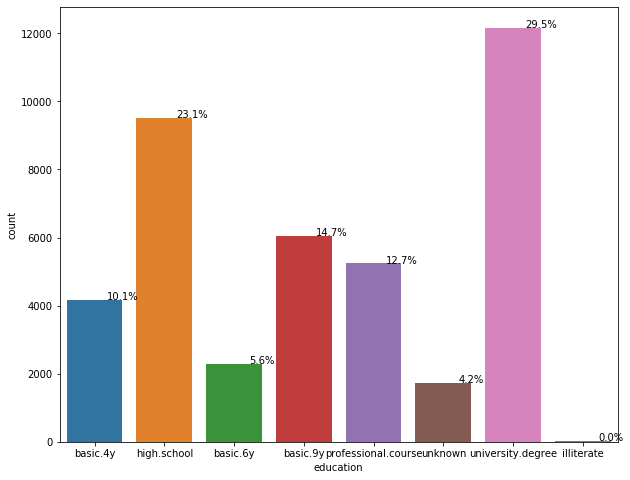

In [13]:

plt.figure(figsize=(10,8))
ax=sns.countplot(x='education',data=df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')



Majority of the customers have Secondary education and beyond.

Analysis of Default

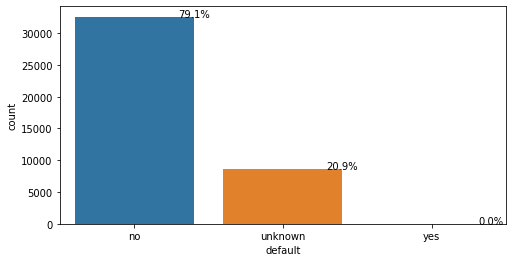

In [14]:
plt.figure(figsize=(8,4))
ax=sns.countplot(x='default',data=df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

Majority of customers haven't defaulted . So this column can be removed. Very low variance.

Analysis of Housing

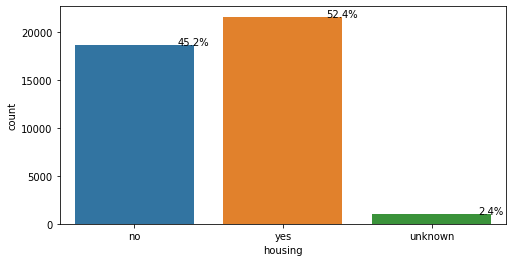

In [15]:
plt.figure(figsize=(8,4))
ax=sns.countplot(x='housing',data=df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

Almost equal split of whether the customers have taken home loan or not

Analysis of Loan

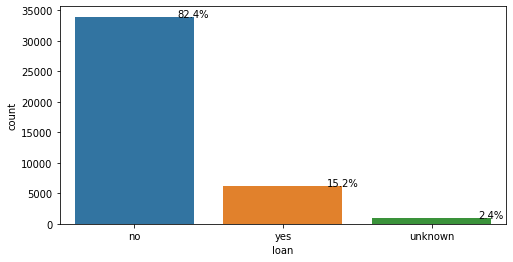

In [16]:

plt.figure(figsize=(8,4))
ax=sns.countplot(x='loan',data=df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

Majority of customers haven't taken any personal loan

Analysis of Month

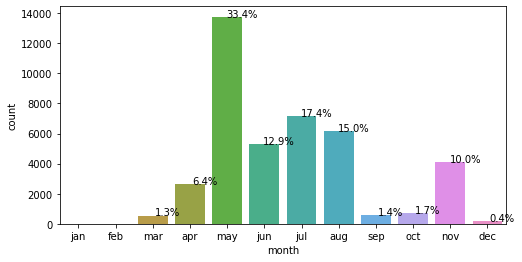

In [17]:
plt.figure(figsize=(8,4))
months=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
ax=sns.countplot(x='month',data=df,order=months)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

Most of the people were called during May-Aug during the current campaign

Q.2. Perform the following pre-processing tasks:

Missing Value Analysis<br>
Label Encoding wherever required<br>
Selecting important features based on Random Forest<br>
Handling unbalanced data using SMOTE<br>
Standardize the data using any one of the scalers provided by sklearn<br>



In [18]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

there is no missing value

In [19]:
colname=[]
for x in df.columns:
    if df[x].dtype=='object' or df[x].dtype=='float' :
        colname.append(x)



In [20]:
# For preprocessing the data
from sklearn.preprocessing import LabelEncoder
 
le=LabelEncoder()
 
for x in colname:
    df[x]=le.fit_transform(df[x])


In [21]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,8,18,16,287,8,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,8,18,16,287,8,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,8,18,16,287,8,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,8,18,16,287,8,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,8,18,16,287,8,0


In [22]:
X = df.iloc[:,0:-1]
Y = df.iloc[:,-1]


In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)
X = scaler.transform(X)

In [24]:
from sklearn.model_selection import train_test_split
 
#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, 
                                                    random_state=10)  

In [25]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(28831, 20)
(12357, 20)
(28831,)
(12357,)


Q.3. Build the following Supervised Learning models: 🡪5 marks

Logistic Regression<br>
Decision Trees<br>
Random Forest<br>


Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

classifier.fit(X_train,Y_train)

Y_pred = classifier.predict(X_test)
print(Y_pred)

[0 0 1 ... 0 0 0]


In [27]:
Y_pred_prob=classifier.predict_proba(X_test)
Y_pred_prob

array([[0.87121039, 0.12878961],
       [0.91933514, 0.08066486],
       [0.38573722, 0.61426278],
       ...,
       [0.99545704, 0.00454296],
       [0.98678146, 0.01321854],
       [0.98616316, 0.01383684]])

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
 
print("Classification report: ")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[10653   282]
 [  857   565]]
Classification report: 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10935
           1       0.67      0.40      0.50      1422

    accuracy                           0.91     12357
   macro avg       0.80      0.69      0.72     12357
weighted avg       0.90      0.91      0.90     12357

Accuracy of the model:  0.907825523994497


Decision Trees

In [29]:
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree=DecisionTreeClassifier(random_state=10,criterion="entropy")

model_DecisionTree.fit(X_train,Y_train)

Y_pred = model_DecisionTree.predict(X_test)
#print(Y_pred)

print(list(zip(Y_test,Y_pred)))

[(0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 1), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 1), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 1), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (1, 1), (0, 0),

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
 
print("Classification report: ")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[10244   691]
 [  678   744]]
Classification report: 
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     10935
           1       0.52      0.52      0.52      1422

    accuracy                           0.89     12357
   macro avg       0.73      0.73      0.73     12357
weighted avg       0.89      0.89      0.89     12357

Accuracy of the model:  0.8892125920530873


In [31]:
from sklearn.ensemble import RandomForestClassifier

model_DecisionTree=RandomForestClassifier(n_estimators=100,random_state=10)
model_DecisionTree.fit(X_train,Y_train)
#fit the model on the data and predict the values
Y_pred=model_DecisionTree.predict(X_test)
print(Y_pred)

[0 0 0 ... 0 0 0]


In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print('Confusion Matrix \n',cfm)
 
print("Classification report: ")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

Confusion Matrix 
 [[10569   366]
 [  739   683]]
Classification report: 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10935
           1       0.65      0.48      0.55      1422

    accuracy                           0.91     12357
   macro avg       0.79      0.72      0.75     12357
weighted avg       0.90      0.91      0.90     12357

Accuracy of the model:  0.9105770008901837


In [33]:
sample=pd.DataFrame()
 
sample["Column"]=df.columns[0:-1]
sample["Imp value"]=model_DecisionTree.feature_importances_
 
sample.sort_values("Imp value",ascending=False)

,Column,Imp value
10,duration,0.311641
18,euribor3m,0.102787
0,age,0.090539
19,nr.employed,0.069859
1,job,0.048518
3,education,0.043226
11,campaign,0.041591
9,day_of_week,0.040577
14,poutcome,0.035320
12,pdays,0.033613


In [34]:
#pip install imbalanced-learn

In [35]:
# droping it because it is less in use
df.drop(['contact','default'],axis=1,inplace=True)

In [36]:
print("Before OverSampling, counts of label '1': ", (sum(Y_train == 1)))
print("Before OverSampling, counts of label '0': ", (sum(Y_train == 0)))
 


from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 10,k_neighbors=5)
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train)
 
print('After OverSampling, the shape of train_X: ', (X_train_res.shape))
print('After OverSampling, the shape of train_y: ', (Y_train_res.shape))
 
print("After OverSampling, counts of label '1': ", (sum(Y_train_res == 1)))
print("After OverSampling, counts of label '0': ", (sum(Y_train_res == 0)))

Before OverSampling, counts of label '1':  3218
Before OverSampling, counts of label '0':  25613
After OverSampling, the shape of train_X:  (51226, 20)
After OverSampling, the shape of train_y:  (51226,)
After OverSampling, counts of label '1':  25613
After OverSampling, counts of label '0':  25613


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
 

# first, initialize the classificators
logreg=LogisticRegression(multi_class="multinomial",random_state=10)
tree= DecisionTreeClassifier(random_state=10) # using the random state for reproducibility
rrt = RandomForestClassifier(n_estimators=100,random_state=10)
 

In [38]:
models= [logreg,tree,rrt]

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
 
for model in models:
    model.fit(X_train, Y_train) # fit the model
    Y_pred= model.predict(X_test) # then predict on the test set
    accuracy= accuracy_score(Y_test, Y_pred)
    clf_report= classification_report(Y_test, Y_pred)
    print(confusion_matrix(Y_test,Y_pred))
    print("The accuracy of the ",type(model).__name__, " model is ", accuracy*100 )
    print("Classification report:\n", clf_report)
    print("\n")

[[10653   282]
 [  857   565]]
The accuracy of the  LogisticRegression  model is  90.7825523994497
Classification report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     10935
           1       0.67      0.40      0.50      1422

    accuracy                           0.91     12357
   macro avg       0.80      0.69      0.72     12357
weighted avg       0.90      0.91      0.90     12357



[[10237   698]
 [  663   759]]
The accuracy of the  DecisionTreeClassifier  model is  88.98599983814842
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94     10935
           1       0.52      0.53      0.53      1422

    accuracy                           0.89     12357
   macro avg       0.73      0.73      0.73     12357
weighted avg       0.89      0.89      0.89     12357



[[10569   366]
 [  739   683]]
The accuracy of the  RandomForestClassifier  model is  91.05

 Tabulate the performance metrics of all the above models, perform tuning of models and tell which model performs better in predicting if the client will subscribe to term deposit or not 

In [40]:
# store the predicted probabilities
print(Y_pred_prob)

[[0.87121039 0.12878961]
 [0.91933514 0.08066486]
 [0.38573722 0.61426278]
 ...
 [0.99545704 0.00454296]
 [0.98678146 0.01321854]
 [0.98616316 0.01383684]]


In [41]:
for a in np.arange(0.4,0.61,0.01):
    predict_mine = np.where(Y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :", 
          cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.4 : 1144  , type 2 error : 744  , type 1 error: 400
Errors at threshold  0.41000000000000003 : 1138  , type 2 error : 756  , type 1 error: 382
Errors at threshold  0.42000000000000004 : 1140  , type 2 error : 770  , type 1 error: 370
Errors at threshold  0.43000000000000005 : 1136  , type 2 error : 782  , type 1 error: 354
Errors at threshold  0.44000000000000006 : 1131  , type 2 error : 791  , type 1 error: 340
Errors at threshold  0.45000000000000007 : 1140  , type 2 error : 807  , type 1 error: 333
Errors at threshold  0.4600000000000001 : 1146  , type 2 error : 818  , type 1 error: 328
Errors at threshold  0.4700000000000001 : 1145  , type 2 error : 825  , type 1 error: 320
Errors at threshold  0.4800000000000001 : 1147  , type 2 error : 836  , type 1 error: 311
Errors at threshold  0.4900000000000001 : 1141  , type 2 error : 846  , type 1 error: 295
Errors at threshold  0.5000000000000001 : 1139  , type 2 error : 857  , type 1 error: 282
Errors at threshold 

In [42]:
Y_pred_class=[]
for value in Y_pred_prob[:,1]:
    if value > 0.43:
        Y_pred_class.append(1)
    else:
        Y_pred_class.append(0)

In [43]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(Y_test,Y_pred_class)
print(cfm)
acc=accuracy_score(Y_test, Y_pred_class)
print("Accuracy of the model: ",acc)
print(classification_report(Y_test, Y_pred_class))

[[10581   354]
 [  782   640]]
Accuracy of the model:  0.9080683013676458
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10935
           1       0.64      0.45      0.53      1422

    accuracy                           0.91     12357
   macro avg       0.79      0.71      0.74     12357
weighted avg       0.90      0.91      0.90     12357



In [44]:
# decision tree preuing

In [45]:
# preuning
from sklearn.tree import DecisionTreeClassifier
 
model_DecisionTree=DecisionTreeClassifier(random_state=10,criterion="gini",splitter="best",min_samples_leaf=3,min_samples_split=5,max_depth=10)
 
model_DecisionTree.fit(X_train,Y_train)
 
Y_pred = model_DecisionTree.predict(X_test)
#print(Y_pred)
 
print(list(zip(Y_test,Y_pred)))
 

[(0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 1), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 1), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0),

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
 
print("Classification report: ")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[10446   489]
 [  694   728]]
Classification report: 
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10935
           1       0.60      0.51      0.55      1422

    accuracy                           0.90     12357
   macro avg       0.77      0.73      0.75     12357
weighted avg       0.90      0.90      0.90     12357

Accuracy of the model:  0.9042647891883143


In [ ]:
import os